<a href="https://colab.research.google.com/github/graveo-wicaksana/DA_Portf_CyclisticMembers/blob/main/DS_Clustering_BMLP_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
#Type your code here
import pandas as pd #import pandas for manipulating and analyzing data
import matplotlib.pyplot as plt #import matplotlib for visualizing graphics
import seaborn as sns #import seaborn for supporting plt
import joblib #import joblib for downloading file
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #import minmaxscaler for scaling data and labelEncoder for encoding data
from sklearn.cluster import KMeans #import KMeans and DBSCAN algorithms for clustering
from sklearn.metrics import silhouette_score #import silhouete_score for evaluation of cluster result
from sklearn.decomposition import PCA #import PCA for dimensionality reduction
from yellowbrick.cluster import KElbowVisualizer #import KELbowVisualizer for visualization Elbow Method

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
print ("Stastitik deskriptif untuk numerik:\n", df.describe())
print ("\nStastitik deskriptif untuk object:\n", df.describe(include=["object"]))

Stastitik deskriptif untuk numerik:
        TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  

Stastitik deskriptif untuk object:
        Transacti

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

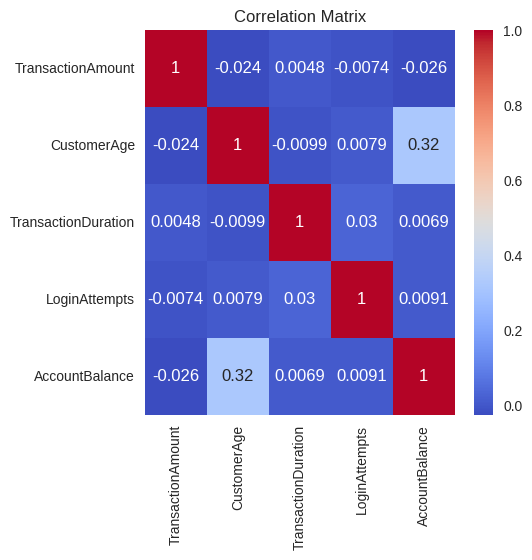

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numeric_features = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


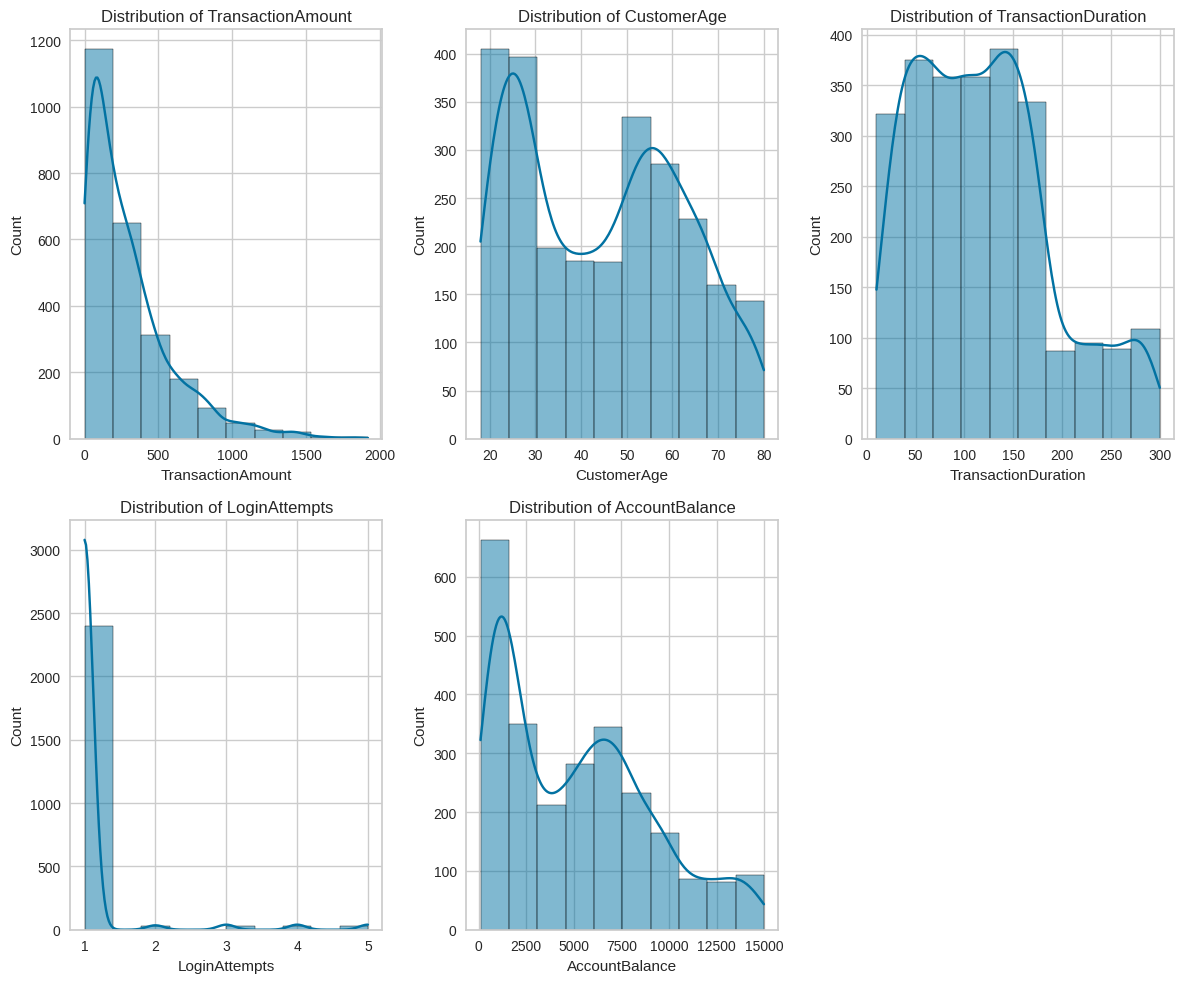

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize=(12, 10))
for i, column in enumerate(numeric_features, 1):
  plt.subplot(2, 3, i)
  sns.histplot(df[column], kde=True, bins=10)
  plt.title (f'Distribution of {column}')

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

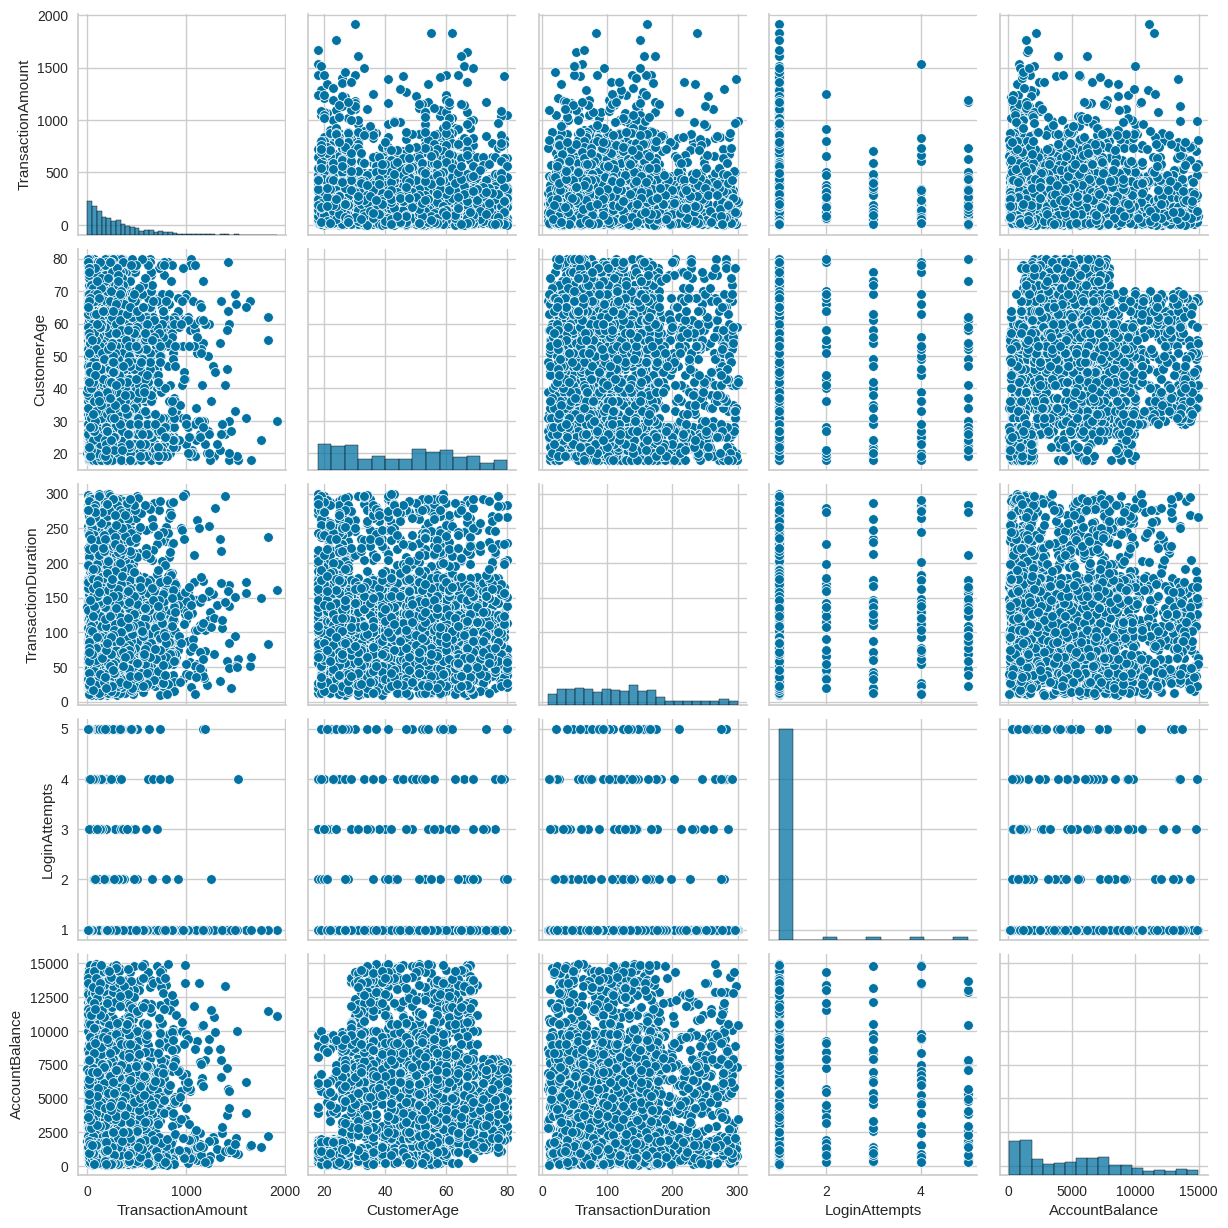

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
print("Total duplicated dataset:", df.duplicated().sum())

#Note: it shows the sum of (all) each set of duplicates

Total duplicated dataset: 21


In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
df_clean = pd.DataFrame(df) #previously without pd.DataFrame #another suggestion is df.copy()
min_max_scaler = MinMaxScaler()
df_clean[numeric_features] = min_max_scaler.fit_transform(df_clean[numeric_features])
#min_max_scale is just used once in this script

df_clean.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

drop_cols = df_clean.columns[df_clean.columns.str.contains('ID|IP Address')]
df_clean.drop(drop_cols, axis=1, inplace=True)
df_clean.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

df_clean['TransactionDate'] = pd.to_datetime(df_clean['TransactionDate'], format='%Y-%m-%d %H:%M:%S')
df_clean['PreviousTransactionDate'] = pd.to_datetime(df_clean['PreviousTransactionDate'], format='%Y-%m-%d %H:%M:%S')
#need to be change to datetime due to the default date data is in object type

category_features = df_clean.select_dtypes(include=['object']).columns

encoders = {} #storing encode of each decoded columns so we can do reverse transforms for each col

for col in category_features:
  label_encoder = LabelEncoder()
  df_clean[col] = label_encoder.fit_transform(df_clean[col])
  encoders[col] = label_encoder

df_clean.head(5)


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_clean.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
total_na_rows = df_clean.isna().any(axis=1).sum()
total_df_rows = len(df_clean)

if total_na_rows/total_df_rows < 0.1:
  df_clean.dropna(inplace=True)
  print('Due to na percentage of na rows/total rows is less than 0.1, then dropna() method is used ^_^')
else:
  print ('Please, use fillna() method')



Due to na percentage of na rows/total rows is less than 0.1, then dropna() method is used ^_^


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_clean.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

Q1 = df_clean[numeric_features].quantile(0.25)
Q3 = df_clean[numeric_features].quantile(0.75)
IQR = Q3 - Q1

bottom_outliers_cond = df_clean[numeric_features] < (Q1 - 1.5*IQR)
top_outliers_cond = df_clean[numeric_features] > (Q3 + 1.5*IQR)
outliers_data = df_clean.loc[((bottom_outliers_cond | top_outliers_cond).any(axis=1)), numeric_features]

if len(outliers_data)/total_df_rows < 0.1:
  df_clean.drop(outliers_data.index, inplace=True)
  print('Due to na percentage of outliers rows/total rows is less than 0.1, then drop() method is used ^_^')
else:
  print ('Please, use imputation method')

Due to na percentage of outliers rows/total rows is less than 0.1, then drop() method is used ^_^


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

#Focussed do binning for Customer Age and Account Balance

#Binning Customer Age
batas_bin = [0, 0.25, 0.5, 0.75, 1]
kategori = ['Remaja', 'Dewasa', 'Tua', 'Sangat Tua']
df_clean['CustomerAge_binned'] = pd.cut(df_clean['CustomerAge'], bins = batas_bin, labels = kategori)

#Binning Account Balance
batas_bin_2 = [0, 0.25, 0.5, 0.75, 1]
kategori_2 = ['Rendah', 'Normal', 'Tinggi', 'Sangat Tinggi']
df_clean['AccountBalance_binned'] = pd.cut(df_clean['AccountBalance'], bins = batas_bin_2, labels = kategori_2)

#Do label encoder
binned_features = df_clean.select_dtypes(include=['category']).columns
encoders_binned = {}

for col in binned_features:
  label_encoder_bin = LabelEncoder()
  df_clean[col] = label_encoder_bin.fit_transform(df_clean[col])
  encoders_binned[col] = label_encoder_bin

#Check Result
df_clean.head(5)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_binned,AccountBalance_binned
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,2,0
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,2,2
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,1,1
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,1,3
5,0.047888,2023-04-03 17:15:01,1,28,0,0.000000,3,0.558621,0.0,0.045738,2024-11-04 08:06:36,4,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_clean.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_binned,AccountBalance_binned
count,2136.000000,2136,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.0,2136.000000,2136,2136.000000,2136.000000
mean,0.132602,2023-07-04 22:57:04.668071168,0.789326,21.502341,1.010300,0.430780,1.529494,0.375592,0.0,0.337208,2024-11-04 08:09:22.648408320,1.582865,1.140918
min,0.000000,2023-01-02 16:00:06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2024-11-04 08:06:23,0.000000,0.000000
25%,0.040391,2023-04-03 16:08:50,1.000000,11.000000,0.000000,0.145161,0.000000,0.181897,0.0,0.094546,2024-11-04 08:07:55,1.000000,0.000000
50%,0.103215,2023-07-05 17:35:41,1.000000,22.000000,1.000000,0.435484,2.000000,0.344828,0.0,0.311965,2024-11-04 08:09:23,1.000000,1.000000
75%,0.194584,2023-10-04 23:28:58.500000,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.0,0.508066,2024-11-04 08:10:52.249999872,3.000000,2.000000
max,0.470558,2024-01-01 18:21:50,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,2024-11-04 08:12:23,4.000000,4.000000
std,0.113161,NaN,0.439926,12.466461,0.825749,0.286235,1.153376,0.242394,0.0,0.261357,NaN,1.162113,1.034891


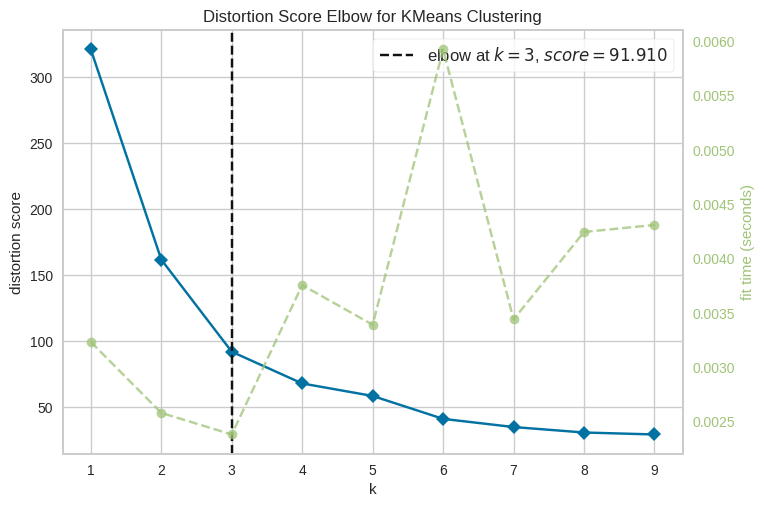

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df_clean.loc[:, ['CustomerAge', 'AccountBalance']].values

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

Analisis Karakteristik Setiap Cluster: 

Cluster 1:
Rata-rata customer age: 0.13
Rata-rata customer balance: 0.11

Cluster 2:
Rata-rata customer age: 0.71
Rata-rata customer balance: 0.30

Cluster 3:
Rata-rata customer age: 0.43
Rata-rata customer balance: 0.65


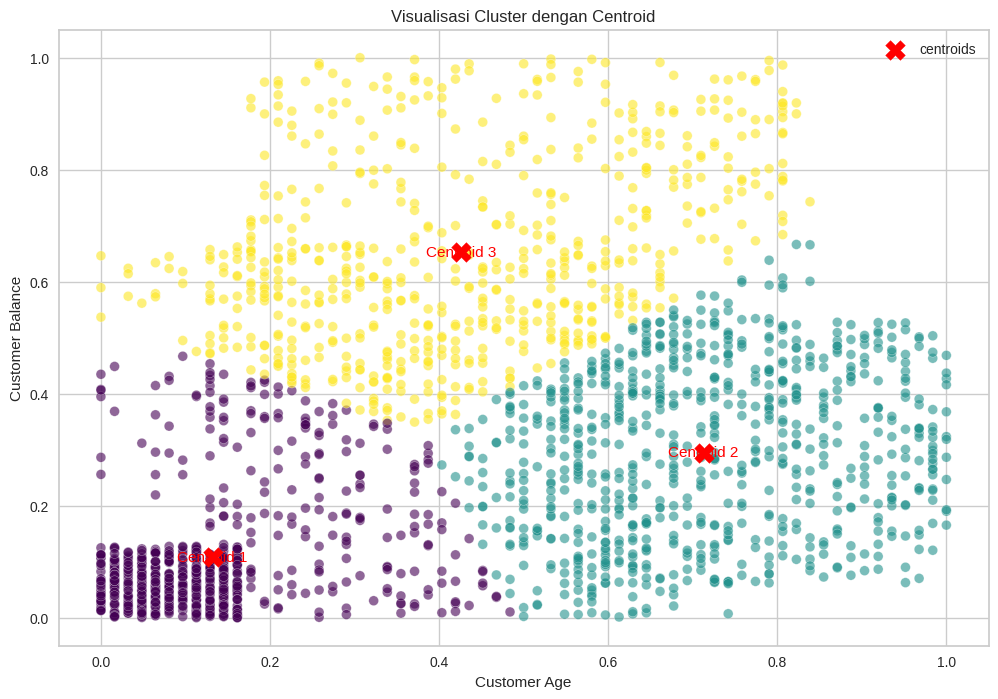

Centroid 1: Customer Age = 0.13, Customer Balance = 0.11
Centroid 2: Customer Age = 0.71, Customer Balance = 0.29
Centroid 3: Customer Age = 0.43, Customer Balance = 0.65


In [ ]:
# Menggunakan algoritma K-Means Clustering

#Inisialisasi dan pelatihan k-means dengan cluster 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

#Assignment lables dan k
labels = kmeans.labels_
k = 3

# Fungsi untuk analisis karakteristik cluster
def analisis_kluster(X, labels, k):
  print("Analisis Karakteristik Setiap Cluster: ")
  for id_kluster in range(k):
    kluster_data = X[labels == id_kluster]

    mean_age = kluster_data[:, 0].mean()
    mean_balance = kluster_data[:, 1].mean()

    print (f"\nCluster {id_kluster + 1}:")
    print (f"Rata-rata customer age: {mean_age:.2f}")
    print (f"Rata-rata customer balance: {mean_balance:.2f}")

# #Analisis karakteristik setiap cluster
analisis_kluster(X, labels, k)

#Menentukan Posisi Centroids
centroids = kmeans.cluster_centers_

#Visualisasi Kluster dengan plotting data dan centroids
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha = 0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='centroids')

#Menambahkan label centroid
for i, centroid in enumerate(centroids):
  plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=11, ha='center', va='center')

#Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Customer Age')
plt.ylabel('Customer Balance')
plt.legend()

plt.show()

# #menampilkan nilai centroids
for i, centroid in enumerate(centroids):
  print (f"Centroid {i+1}: Customer Age = {centroid[0]:.2f}, Customer Balance = {centroid[1]:.2f}")

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

Silhouette_scores = []
number_of_cluster = range(2, 10)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)

  labels_2 = kmeans.labels_
  Silhouette_scores.append(silhouette_score(X, labels_2, metric='euclidean'))

show_Silhouette_scores = pd.DataFrame(Silhouette_scores, columns=['Silhouette_scores'])
show_Silhouette_scores['k values'] = [i for i in range(2, 10)]
show_Silhouette_scores = show_Silhouette_scores[['k values', 'Silhouette_scores']]

print (show_Silhouette_scores) #k values with 3 is still the highest

   k values  Silhouette_scores
0         2           0.453597
1         3           0.485634
2         4           0.485339
3         5           0.473480
4         6           0.483646
5         7           0.455029
6         8           0.470516
7         9           0.459385


Text(0, 0.5, 'Silhouette scores')

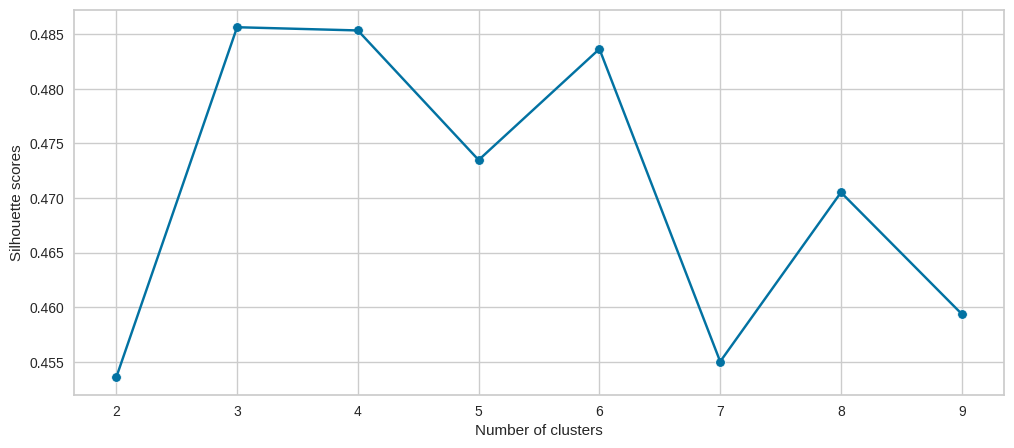

In [ ]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(12, 5))
sns.lineplot(x = range(2, 10), y=Silhouette_scores)
sns.scatterplot(x = range(2, 10), y=Silhouette_scores)
plt.xticks = range(2, 10)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette scores')

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Variance ratio of all components:  [9.84623423e-01 8.69202747e-03 4.38077196e-03 1.16589607e-03
 4.52581244e-04 3.71019167e-04 2.33376698e-04 8.09039823e-05
 0.00000000e+00]
   k values  Silhouette_scores
0         2           0.608879
1         3           0.562627
2         4           0.539218
3         5           0.515342
4         6           0.488572
5         7           0.464532
6         8           0.449171
7         9           0.432831


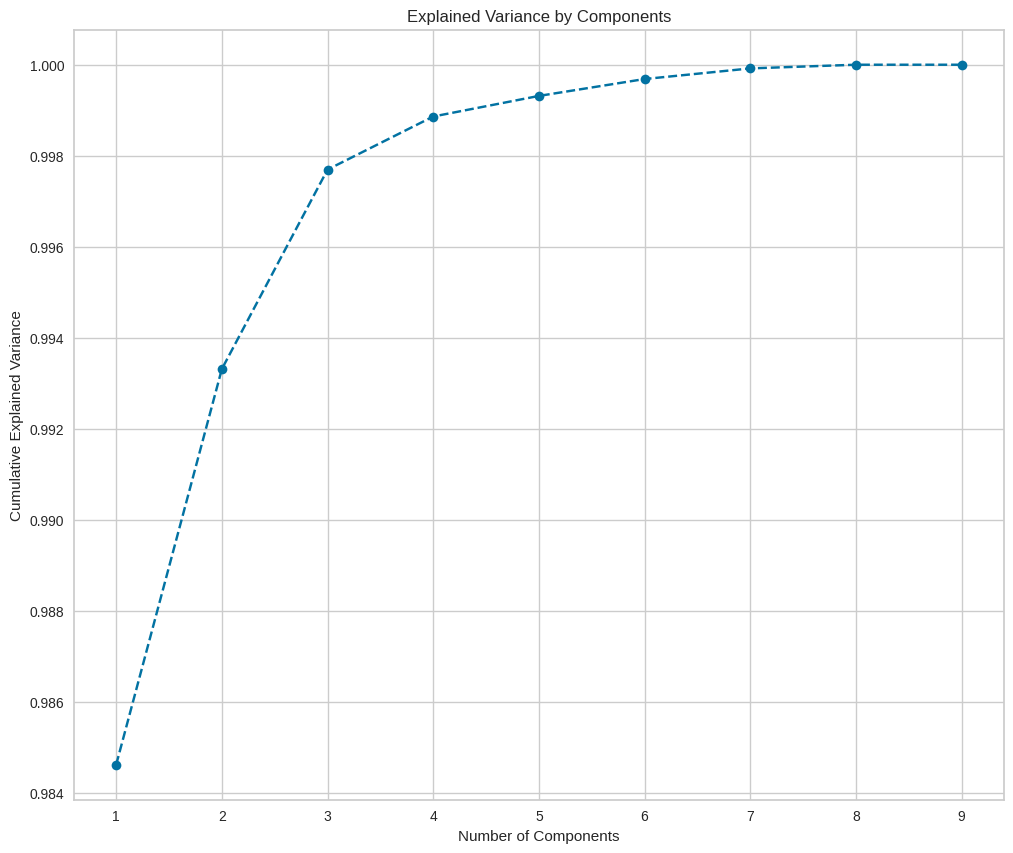

In [ ]:
# Membangun model menggunakan PCA.
#Menggunakan materi dari sumber lain dan sedikit modifikasi^_^

X_pca = df_clean.drop(columns=['TransactionDate', 'PreviousTransactionDate', 'CustomerAge_binned', 'AccountBalance_binned']) #9 columns include binned
#Notes: X_pre_pca has been fit_transform

#menentukan nilai komponen
pca = PCA() #Aware
pca.fit(X_pca)
explained_variance = pca.explained_variance_ratio_
print ("Variance ratio of all components: ", explained_variance)

plt.figure(figsize=(12, 10))
plt.plot(range(1, 10), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

#Choose components with 0.99 variance, which is 2 (it is good enough. from previous graph)
pca = PCA(n_components=2)
pca.fit(X_pca)
scores_pca = pca.transform(X_pca)

# Periksa score kmeans_pca
Silhouette_scores_pca = []
number_of_cluster_pca = range(2, 10)

for i in number_of_cluster_pca:
  kmeans_pca = KMeans(n_clusters = i)
  kmeans_pca.fit(scores_pca)

  labels_pca = kmeans_pca.labels_
  Silhouette_scores_pca.append(silhouette_score(scores_pca, labels_pca, metric='euclidean'))

show_Silhouette_scores_pca = pd.DataFrame(Silhouette_scores_pca, columns=['Silhouette_scores'])
show_Silhouette_scores_pca['k values'] = [i for i in range(2, 10)]
show_Silhouette_scores_pca = show_Silhouette_scores_pca[['k values', 'Silhouette_scores']]

print (show_Silhouette_scores_pca)
#best k values is 2.

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(scores_pca)
labels_pca = kmeans_pca.labels_


In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
#numerik
df_clean['Target'] = labels
numerik_agg_df_clean = df_clean.groupby('Target').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max']
})
print (numerik_agg_df_clean)

       TransactionAmount                     CustomerAge                      \
                    mean       min       max        mean       min       max   
Target                                                                         
0               0.137186  0.000000  0.463809    0.132654  0.000000  0.483871   
1               0.130764  0.000302  0.462939    0.713160  0.403226  1.000000   
2               0.129600  0.000031  0.470558    0.425633  0.000000  0.838710   

       TransactionDuration                LoginAttempts            \
                      mean  min       max          mean  min  max   
Target                                                              
0                 0.381315  0.0  0.996552           0.0  0.0  0.0   
1                 0.368642  0.0  0.996552           0.0  0.0  0.0   
2                 0.377575  0.0  1.000000           0.0  0.0  0.0   

       AccountBalance                      
                 mean       min       max  
Target          

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Nasabah Muda, Saldo Sedikit)**:
  - **Rata-rata (mean) Umur Nasabah:** 0,13 <Setelah inverse>
  - **Rata-rata (mean) Saldo Nasabah:** 0,11 <Setelah inverse>
  - **Analisis:** Cluster ini menggambarkan segment nasabah dengan umur yang muda dan saldo rekening yang sedikit. Nasabah segment ini mungkin masih mendapatkan uang dari orang tua dan belum memiliki penghasilan yang banyak.
2. **Cluster 2: (Nasabah Tua, Saldo Cukup)**:
  - **Rata-rata (mean) Umur Nasabah:** 0,71 <Setelah inverse>
  - **Rata-rata (mean) Saldo Nasabah:** 0,29 <Setelah inverse>
  - **Analisis:** Cluster ini menggambarkan segment nasabah dengan umur yang tuda dan saldo rekening yang cukup. Nasabah segment ini didominasi oleh nasabah yang sudah pensiun dan tidak ada penghasilan mandiri lagi, namun bisa jadi mendapatkan pemasukan dari anak-anaknya serta simpanan tabungan hari tua.
3. **Cluster 3: (Nasabah Dewasa, Saldo Banyak)**:
  - **Rata-rata (mean) Umur Nasabah:** 0,43 <Setelah inverse>
  - **Rata-rata (mean) Saldo Nasabah:** 0,65 <Setelah inverse>
  - **Analisis:** Cluster ini menggambarkan segment nasabah dengan umur yang dewasa (menengah) dan saldo rekening yang banyak. Nasabah segment ini diisi oleh nasabah yang masih berada pada usia produktif dan memiliki penghasilan yang tinggi

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_clean['Target'] = labels
df_clean.head(5)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_binned,AccountBalance_binned,Target
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,2,0,1
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,2,2,2
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,1,1,0
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,1,3,2
5,0.047888,2023-04-03 17:15:01,1,28,0,0.000000,3,0.558621,0.0,0.045738,2024-11-04 08:06:36,4,1,0


In [ ]:
# Simpan Data
df_clean.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal

df_clean[numeric_features] = min_max_scaler.inverse_transform(df_clean[numeric_features])
df_clean.head(5)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_binned,AccountBalance_binned,Target
0,14.09,2023-04-11 16:29:14,1,36,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,2,0,1
1,376.24,2023-06-27 16:44:19,1,15,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,2,2,2
2,126.29,2023-07-10 18:16:08,1,23,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,1,1,0
3,184.50,2023-05-05 16:32:11,1,33,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,1,3,2
5,92.15,2023-04-03 17:15:01,1,28,0,18.0,3,172.0,1.0,781.68,2024-11-04 08:06:36,4,1,0


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.

for col in category_features:
  if col in encoders:
    df_clean[col] = encoders[col].inverse_transform(df_clean[col])
  else:
    print("Check the columns of previous encoded labels and after encoded labels")

for col in binned_features:
  if col in encoders_binned:
    df_clean[col] = encoders_binned[col].inverse_transform(df_clean[col])
  else:
    print("Check the columns of previous encoded labels and after encoded labels")

df_clean.head(5)


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_binned,AccountBalance_binned,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Sangat Tua,Normal,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Sangat Tua,Sangat Tinggi,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Remaja,Rendah,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Remaja,Tinggi,2
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,NaN,Rendah,0


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

#numerik
numerik_agg_df_clean = df_clean.groupby('Target').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max']
}).round(0)
print (numerik_agg_df_clean)

#object
object_agg_df_clean = df_clean.groupby('Target').agg(
    TransactionType_Mode = ('TransactionType', lambda x: x.mode().iloc[0]),
    Location_Mode = ('Location', lambda x: x.mode().iloc[0]),
    Channel_Mode = ('Channel', lambda x: x.mode().iloc[0]),
    CustomerOccupation_Mode = ('CustomerOccupation', lambda x: x.mode().iloc[0])
)
print (object_agg_df_clean)

       TransactionAmount             CustomerAge              \
                    mean  min    max        mean   min   max   
Target                                                         
0                  263.0  0.0  890.0        26.0  18.0  48.0   
1                  251.0  1.0  889.0        62.0  43.0  80.0   
2                  249.0  0.0  903.0        44.0  18.0  70.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0                    121.0  10.0  299.0           1.0  1.0  1.0   
1                    117.0  10.0  299.0           1.0  1.0  1.0   
2                    119.0  10.0  300.0           1.0  1.0  1.0   

       AccountBalance                   
                 mean     min      max  
Target                                  
0              1707.0   101.0   7047.0  
1              4494.0   121.0  10017.0  
2      

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Nasabah Muda, Saldo Sedikit)**:
  - **Rata-rata (mean) Umur Nasabah:** 26 <Setelah inverse>
  - **Rata-rata (mean) Saldo Nasabah:** 1707 <Setelah inverse>
  - **Analisis:** Cluster ini menggambarkan segment nasabah dengan umur yang muda dan saldo rekening yang sedikit. Nasabah segment ini mungkin masih mendapatkan uang dari orang tua dan belum memiliki penghasilan yang banyak.
2. **Cluster 2: (Nasabah Tua, Saldo Cukup)**:
  - **Rata-rata (mean) Umur Nasabah:** 62 <Setelah inverse>
  - **Rata-rata (mean) Saldo Nasabah:** 4494 <Setelah inverse>
  - **Analisis:** Cluster ini menggambarkan segment nasabah dengan umur yang tuda dan saldo rekening yang cukup. Nasabah segment ini didominasi oleh nasabah yang sudah pensiun dan tidak ada penghasilan mandiri lagi, namun bisa jadi mendapatkan pemasukan dari anak-anaknya serta simpanan tabungan hari tua.
3. **Cluster 3: (Nasabah Dewasa, Saldo Banyak)**:
  - **Rata-rata (mean) Umur Nasabah:** 44 <Setelah inverse>
  - **Rata-rata (mean) Saldo Nasabah:** 9805 <Setelah inverse>
  - **Analisis:** Cluster ini menggambarkan segment nasabah dengan umur yang dewasa (menengah) dan saldo rekening yang banyak. Nasabah segment ini diisi oleh nasabah yang masih berada pada usia produktif dan memiliki penghasilan yang tinggi

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
result = pd.concat([df_clean, df], axis=1).reindex(df_clean.index)
unique_columns = ~result.columns.duplicated()
final_result = result.loc[:, unique_columns]
final_result


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_binned,AccountBalance_binned,Target,TransactionID,AccountID,DeviceID,IP Address,MerchantID
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Sangat Tua,Normal,1.0,TX000001,AC00128,D000380,162.198.218.92,M015
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Sangat Tua,Sangat Tinggi,2.0,TX000002,AC00455,D000051,13.149.61.4,M052
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Remaja,Rendah,0.0,TX000003,AC00019,D000235,215.97.143.157,M009
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Remaja,Tinggi,2.0,TX000004,AC00070,D000187,200.13.225.150,M002
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,NaN,Rendah,0.0,TX000006,AC00393,D000579,117.67.192.211,M054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,185.97,2023-02-24 16:24:46,Debit,Denver,Online,23.0,Student,19.0,1.0,1776.91,2024-11-04 08:12:22,Remaja,Rendah,0.0,TX002511,AC00118,D000634,21.190.11.223,M041
2511,243.08,2023-02-14 16:21:23,Credit,Jacksonville,Online,24.0,Student,93.0,1.0,131.25,2024-11-04 08:07:49,Remaja,Rendah,0.0,TX002512,AC00009,D000215,59.127.135.25,M041
2523,12.18,2023-04-20 18:50:39,Debit,New York,Branch,76.0,Retired,77.0,1.0,4909.24,2024-11-04 08:07:37,Sangat Tua,Normal,1.0,TX001691,AC00442,D000326,190.152.148.249,M088
2524,232.12,2023-12-28 17:31:03,Debit,Omaha,ATM,37.0,Engineer,51.0,1.0,6689.87,2024-11-04 08:09:17,Dewasa,Normal,2.0,TX000076,AC00239,D000073,156.173.170.140,M066


In [ ]:
# Simpan Data
final_result.to_csv('data_clustering_inverse.csv', index=False)